<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Crop Prediction System</p> 

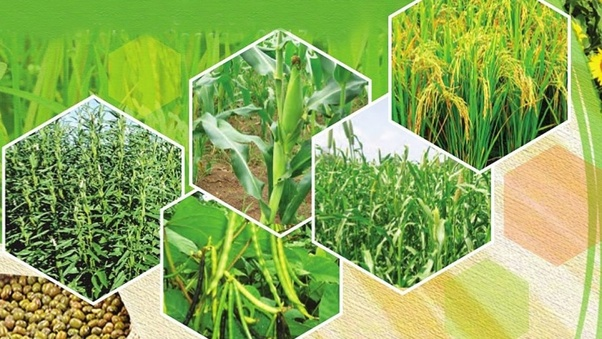

<div style="background-color:#d5eae9; padding:20px; font-size:15px">

**📱This notebook includes the following:**

1. Import Required Libraries
2. Checking Statistics of Each Group
3. Exploratory Data Analysis
4. Feature Selection
5. Modeling Algorithms
6. Model Trails
    
**📱Objective:**   
    
To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1) Import Required Libraries</p> 

In [1]:
# Library to perform Data Manipulation and Analysis
import pandas as pd
# Library to work with arrays / Perform Linear Algebra
import numpy as np
# Library to generate random numbers
import random

# Libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Library that automatically creates user interface (UI) controls for exploring code and data interactively.
from ipywidgets import interact

# Library used to split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Model_selection is a method for setting a blueprint to analyze data and then using it to measure new data.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier

# The sklearn.tree module includes decision tree-based models for classification and regression.
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# The sklearn.ensemble module includes ensemble-based methods for classification, regression and anomaly detection.
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

# The sklearn.naive_bayes module implements Naive Bayes algorithms. 
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

# Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Crop Recommendation csv file
Crop_df = pd.read_csv("Crop_recommendation.csv")
Crop_df.head(10) # Displaying 1st 10 rows in the DataFrame.

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

***Data fields***
- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [3]:
# Shape of Dataset.
print ("Dataset Shape: ", Crop_df.shape)

Dataset Shape:  (2200, 8)


***Dataset contains 2200 records and 8 columns.***

In [4]:
## count unique values in 'label' columns

Crop_df['label'].value_counts(sort=True)

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

***Each item has unique value count of 100.***

In [5]:
## lets check null values

Crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

***No Null Value is present in the Dataset.***

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Cheking Statistics for each group</p> 

In [6]:
#Checking the Statistics for all the crops
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(Crop_df['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(Crop_df['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(Crop_df['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(Crop_df['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(Crop_df['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(Crop_df['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(Crop_df['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  50.55
Average Ratio of Phosphorous in the soil :  53.36
Average Ratio of Potassium in the soil :  48.15
Average temperature in Celsius :  25.62
Average Relative Humidity in % is :  71.48
Average pH value of the soil :  6.47
Average Rain fall in mm :  103.46


- ***Above shows that nitrogen,Phosphorous and potassium should be around 50%***
- ***Temperature should be around 25°C and Humidity around 70%***
- ***Rain fall should be around 100mm and PH should be arount 7***

In [7]:
#Checking Statistics for each Crop

@interact
def summary(crops = list(Crop_df['label'].value_counts().index)):
    x = Crop_df[Crop_df['label'] == crops]
    print("-------------------------------------------------")
    print("Statistics for Nitrogen :")
    print("Minimum Nitrogen Required :", x['N'].min())
    print("Average Nitrogen Required :", x['N'].mean())
    print("Maximum Nitrogen Required :", x['N'].max())
    print("-------------------------------------------------")
    print("Statistics for Phosphorous :")
    print("Minimum Phosphorous Required :", x['P'].min())
    print("Average Phosphorous Required :", x['P'].mean())
    print("Maximum Phosphorous Required :", x['P'].max())
    print("-------------------------------------------------")
    print("Statistics for Potassium :")
    print("Minimum Potassium Required :", x['K'].min())
    print("Average Potassium Required :", x['K'].mean())
    print("Maximum Potassium Required :", x['K'].max())
    print("-------------------------------------------------")
    print("Statistics for Temperature :")
    print("Minimum Temperature Required : {0: .2f}".format(x['temperature'].min()))
    print("Average Temperature Required : {0: .2f}".format(x['temperature'].mean()))
    print("Maximum Temperature Required : {0: .2f}".format(x['temperature'].max()))
    print("-------------------------------------------------")
    print("Statistics for Humidity :")
    print("Minimum Humidity Required : {0: .2f}".format(x['humidity'].min()))
    print("Average Humidity Required : {0: .2f}".format(x['humidity'].mean()))
    print("Maximum Humidity Required : {0: .2f}".format(x['humidity'].max()))
    print("-------------------------------------------------")
    print("Statistics for PH :")
    print("Minimum PH Required : {0: .2f}".format(x['ph'].min()))
    print("Average PH Required : {0: .2f}".format(x['ph'].mean()))
    print("Maximum PH Required : {0: .2f}".format(x['ph'].max()))
    print("-------------------------------------------------")
    print("Statistics for Rainfall :")
    print("Minimum Rainfall Required : {0: .2f}".format(x['rainfall'].min()))
    print("Average Rainfall Required : {0: .2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall Required : {0: .2f}".format(x['rainfall'].max()))
    print("-------------------------------------------------")
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [8]:
# Lets compare the average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for",conditions,"is {0: .2f}".format(Crop_df[conditions].mean()))
    print("----------------------------------------------------------------")
    print("Rice : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'blackgram')][conditions].mean()))
    print("Banana : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'banana')][conditions].mean()))
    print("Jute : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'watermelon')][conditions].mean()))
    print("Kedney Beans : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'mungbean')][conditions].mean()))
    print("Oranges : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'chickpea')][conditions].mean()))
    print("Lentils : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon peas : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'mango')][conditions].mean()))
    print("Pomegrante : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'pomegrante')][conditions].mean()))
    print("Coffee : {0: .2f}".format(Crop_df[(Crop_df['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

***We can find rainfall,temperature,humidity,Nitrogen,Potassium,Phosphorous and ph value of every individual crop by selecting on the drop down menu.***

In [9]:
y = Crop_df.round().groupby('label').agg((['min', 'max']))
y

N         P         K      temperature       humidity         \
             min  max  min  max  min  max         min   max      min    max   
label                                                                         
apple          0   40  120  145  195  205        21.0  24.0     90.0   95.0   
banana        80  120   70   95   45   55        25.0  30.0     75.0   85.0   
blackgram     20   60   55   80   15   25        25.0  35.0     60.0   70.0   
chickpea      20   60   55   80   75   85        17.0  21.0     14.0   20.0   
coconut        0   40    5   30   25   35        25.0  30.0     90.0  100.0   
coffee        80  120   15   40   25   35        23.0  28.0     50.0   70.0   
cotton       100  140   35   60   15   25        22.0  26.0     75.0   85.0   
grapes         0   40  120  145  195  205         9.0  42.0     80.0   84.0   
jute          60  100   35   60   35   45        23.0  27.0     71.0   90.0   
kidneybeans    0   40   55   80   15   25        15.0  25.0     18.0   25.0   
lentil         0   40   55   80   15   25        18.0  30.0     60.0   70.0   
maize         60  100   35   60   15   25        18.0  27.0     55.0   75.0   
mango          0   40   15   40   25   35        27.0  36.0     45.0   55.0   
mothbeans      0   40   35   60   15   25        24.0  32.0     40.0   65.0   
mungbean       0   40   35   60   15   25        27.0  30.0     80.0   90.0   
muskmelon     80  120    5   30   45   55        27.0  30.0     90.0   95.0   
orange         0   40    5   30    5   15        10.0  35.0     90.0   95.0   
papaya        31   70   46   70   45   55        23.0  44.0     90.0   95.0   
pigeonpeas     0   40   55   80   15   25        18.0  37.0     30.0   70.0   
pomegranate    0   40    5   30   35   45        18.0  25.0     85.0   95.0   
rice          60   99   35   60   35   45        20.0  27.0     80.0   85.0   
watermelon    80  120    5   30   45   55        24.0  27.0     80.0   90.0   

              ph       rainfall         
             min   max      min    max  
label                                   
apple        6.0   6.0    100.0  125.0  
banana       6.0   6.0     90.0  120.0  
blackgram    7.0   8.0     60.0   75.0  
chickpea     6.0   9.0     65.0   95.0  
coconut      6.0   6.0    131.0  226.0  
coffee       6.0   7.0    115.0  199.0  
cotton       6.0   8.0     61.0  100.0  
grapes       6.0   6.0     65.0   75.0  
jute         6.0   7.0    150.0  200.0  
kidneybeans  6.0   6.0     60.0  150.0  
lentil       6.0   8.0     35.0   55.0  
maize        6.0   7.0     61.0  110.0  
mango        5.0   7.0     89.0  101.0  
mothbeans    4.0  10.0     31.0   74.0  
mungbean     6.0   7.0     36.0   60.0  
muskmelon    6.0   7.0     20.0   30.0  
orange       6.0   8.0    100.0  120.0  
papaya       7.0   7.0     40.0  249.0  
pigeonpeas   5.0   7.0     90.0  199.0  
pomegranate  6.0   7.0    103.0  112.0  
rice         5.0   8.0    183.0  299.0  
watermelon   6.0   7.0     40.0   60.0

In [10]:
## lets speak with data

print("Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['N'] > 120]['label'].unique()))
print("\n\nQuestion.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['P'] > 100]['label'].unique()))
print("\n\nQuestion.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['K'] > 200]['label'].unique()))
print("\n\nQuestion.No 4. Crops which requires very High Rainfall ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['rainfall'] > 200]['label'].unique()))
print("\n\nQuestion.No 5. Crops which requires very Low Temperature ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['temperature'] < 10]['label'].unique()))
print("\n\nQuestion.No 6. Crops which requires very High Temperature ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['temperature'] > 40]['label'].unique()))
print("\n\nQuestion.No 7. Crops which requires very Low Humidity ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['humidity'] < 20]['label'].unique()))
print("\n\nQuestion.No 8. Crops which requires very Low pH ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['ph'] < 4]['label'].unique()))
print("\n\nQuestion.No 9. Crops which requires very High pH ? \n\nData: The answer is : {}" .format(Crop_df[Crop_df['ph'] > 9]['label'].unique()))

Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? 

Data: The answer is : ['cotton']


Question.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 4. Crops which requires very High Rainfall ? 

Data: The answer is : ['rice' 'papaya' 'coconut']


Question.No 5. Crops which requires very Low Temperature ? 

Data: The answer is : ['grapes']


Question.No 6. Crops which requires very High Temperature ? 

Data: The answer is : ['grapes' 'papaya']


Question.No 7. Crops which requires very Low Humidity ? 

Data: The answer is : ['chickpea' 'kidneybeans']


Question.No 8. Crops which requires very Low pH ? 

Data: The answer is : ['mothbeans']


Question.No 9. Crops which requires very High pH ? 

Data: The answer is : ['mothbeans']


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Exploratory Data Analysis(EDA)</p> 

### Overall Distribution

In [11]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 150

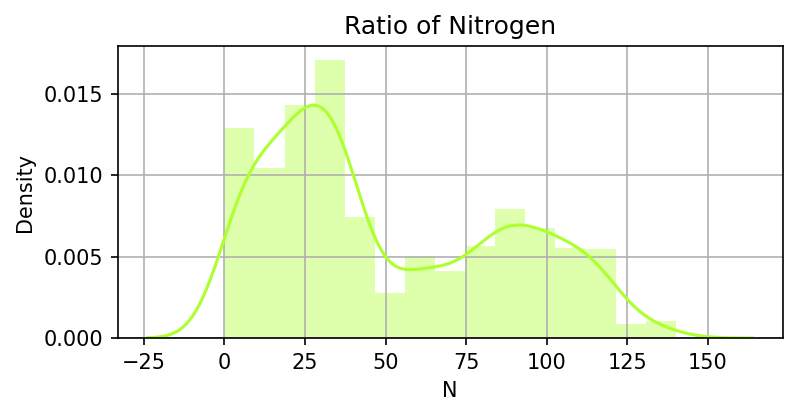

In [12]:
# ratio of Nitrogen content in soil
plt.subplot(4, 2, 1)
sns.distplot(Crop_df['N'], color='greenyellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

#### Importance of Nitrogen to the Plant

- Nitrogen is an essential nutrient for plant growth, development and reproduction.
- Soil nitrogen exists in three general forms: organic nitrogen compounds, ammonium (NH₄⁺) ions and nitrate (NO₃⁻) ions.

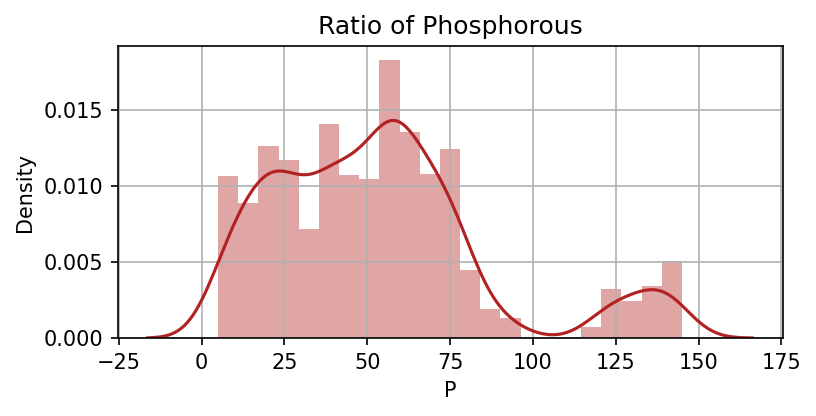

In [13]:
# ratio of Phosphorous content in soil
plt.subplot(4, 2, 2)
sns.distplot(Crop_df['P'], color='firebrick')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()

#### Importance of Phosphorous to the Plant

- Phosphorus is important for cell division and development of new tissues.
- Adding phosphorous to plants helps for root growth.
- It also recommend for early growth of plants.

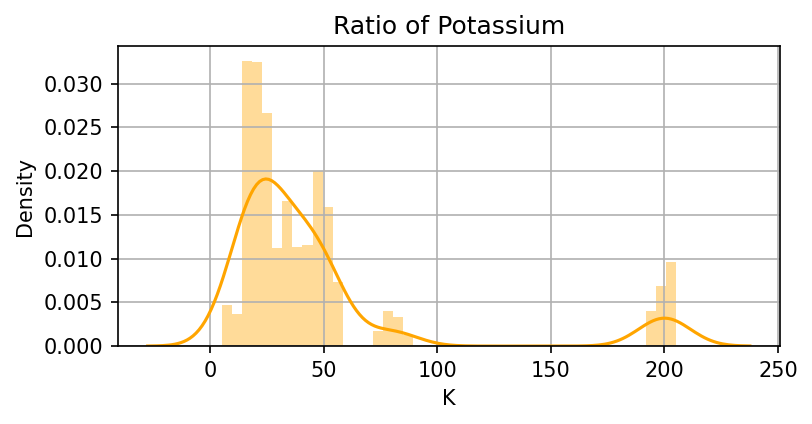

In [14]:
# ratio of Potassium content in soil
plt.subplot(4, 2, 3)
sns.distplot(Crop_df['K'], color = 'orange')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()

#### Importance of Potassium to the Plant

- The rate of respiration by plants is largely the determining factor for proper uptake and transport of potassium by plants.
- Potassium also facilitates protein and starch synthesis in plants.
- It activates enzymes responsible for specific functions.

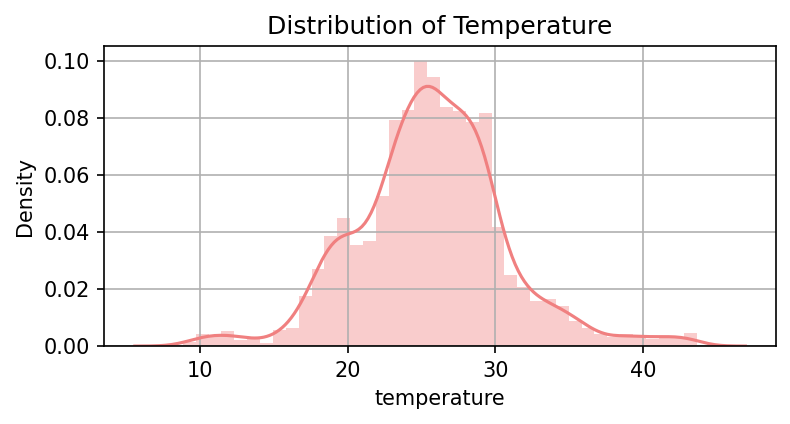

In [15]:
# temperature in degree Celsius
plt.subplot(4, 2, 4)
sns.distplot(Crop_df['temperature'], color = 'lightcoral')
plt.title('Distribution of Temperature', fontsize = 12)
plt.tight_layout()
plt.grid()

#### Importance of Temperature to the Plant

- Under specific conditions, plants photosynthesize (build up) and respire (break down) during optimum daytime temperatures and then curtail respiration at night.

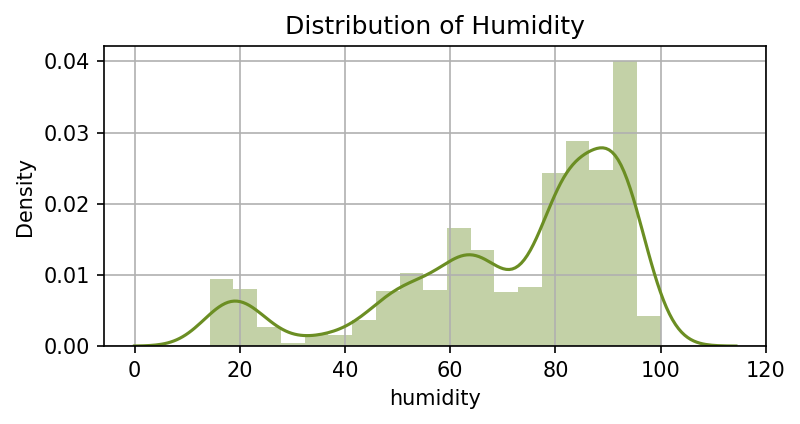

In [16]:
# humidity - relative humidity in %
plt.subplot(4, 2, 5)
sns.distplot(Crop_df['humidity'], color = 'olivedrab')
plt.title('Distribution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

#### Importance of Humidity to the Plant

- Relative humidity (RH) directly influences the water relations of plants and indirectly affects leaf growth, photosynthesis, pollination, occurrence of diseases and finally economic yield.

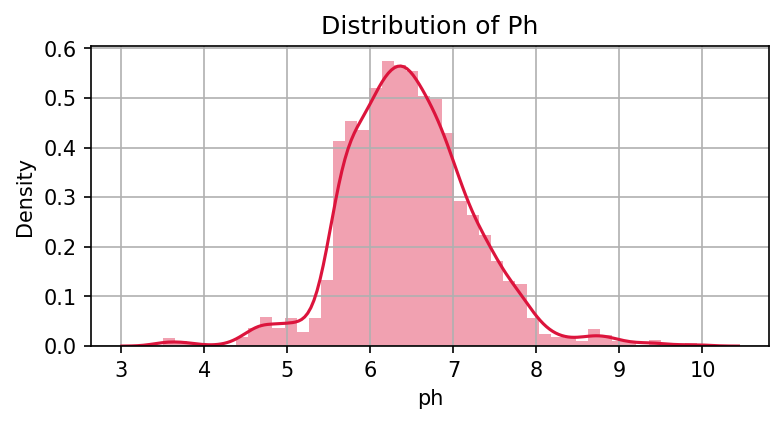

In [17]:
# ph - ph value of the soil
plt.subplot(4, 2, 6)
sns.distplot(Crop_df['ph'], color = 'crimson')
plt.title('Distribution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()

#### Importance of PH to the Plant

- Soil pH regulates plant nutrient availability by controlling the chemical forms of the different nutrients and also influences their chemical reactions. 
- As a result, soil and crop productivities are linked to soil pH value.

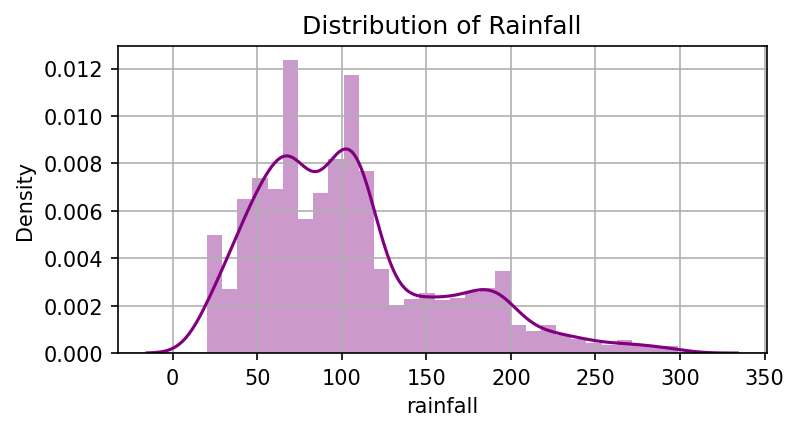

In [18]:
# rainfall - rainfall in mm
plt.subplot(4, 2, 7)
sns.distplot(Crop_df['rainfall'], color = 'purple')
plt.title('Distribution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()

#### Importance of Rainfall to the Plant.

- All plants need at least some water to survive, therefore rain (being the most effective means of watering) is important to agriculture.
- Too much or too little rainfall can be harmful, even devastating to crops. 
- Drought can kill crops and increase erosion, while overly wet weather can cause harmful fungus growth. 
- Plants need varying amounts of rainfall to survive.

In [19]:
#### Array with various color Codes

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [20]:
crop_summary = pd.pivot_table(Crop_df,index=['label'],aggfunc='mean')

In [21]:
crop_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

In [22]:
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

Text(0.5, 0, 'crops')

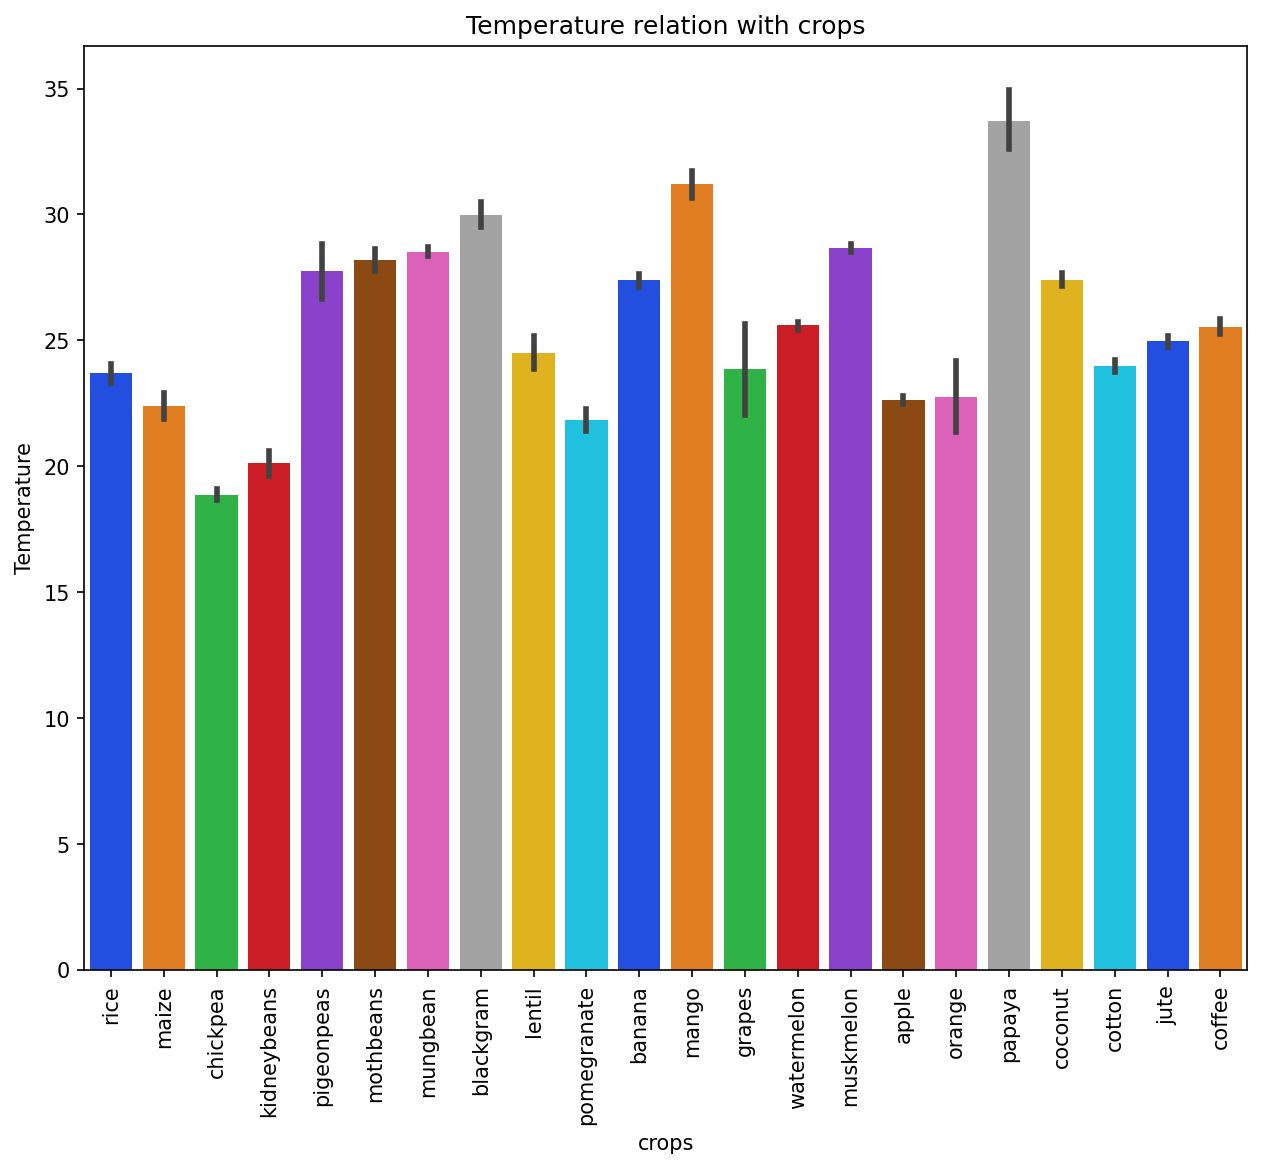

In [23]:
plt.figure(figsize=(10,8))
plt.title("Temperature relation with crops")
sns.barplot(y="temperature",x="label", data=Crop_df,palette='bright')
plt.xticks(rotation='vertical')
plt.ylabel("Temperature")
plt.xlabel("crops")



Text(0.5, 0, 'crops')

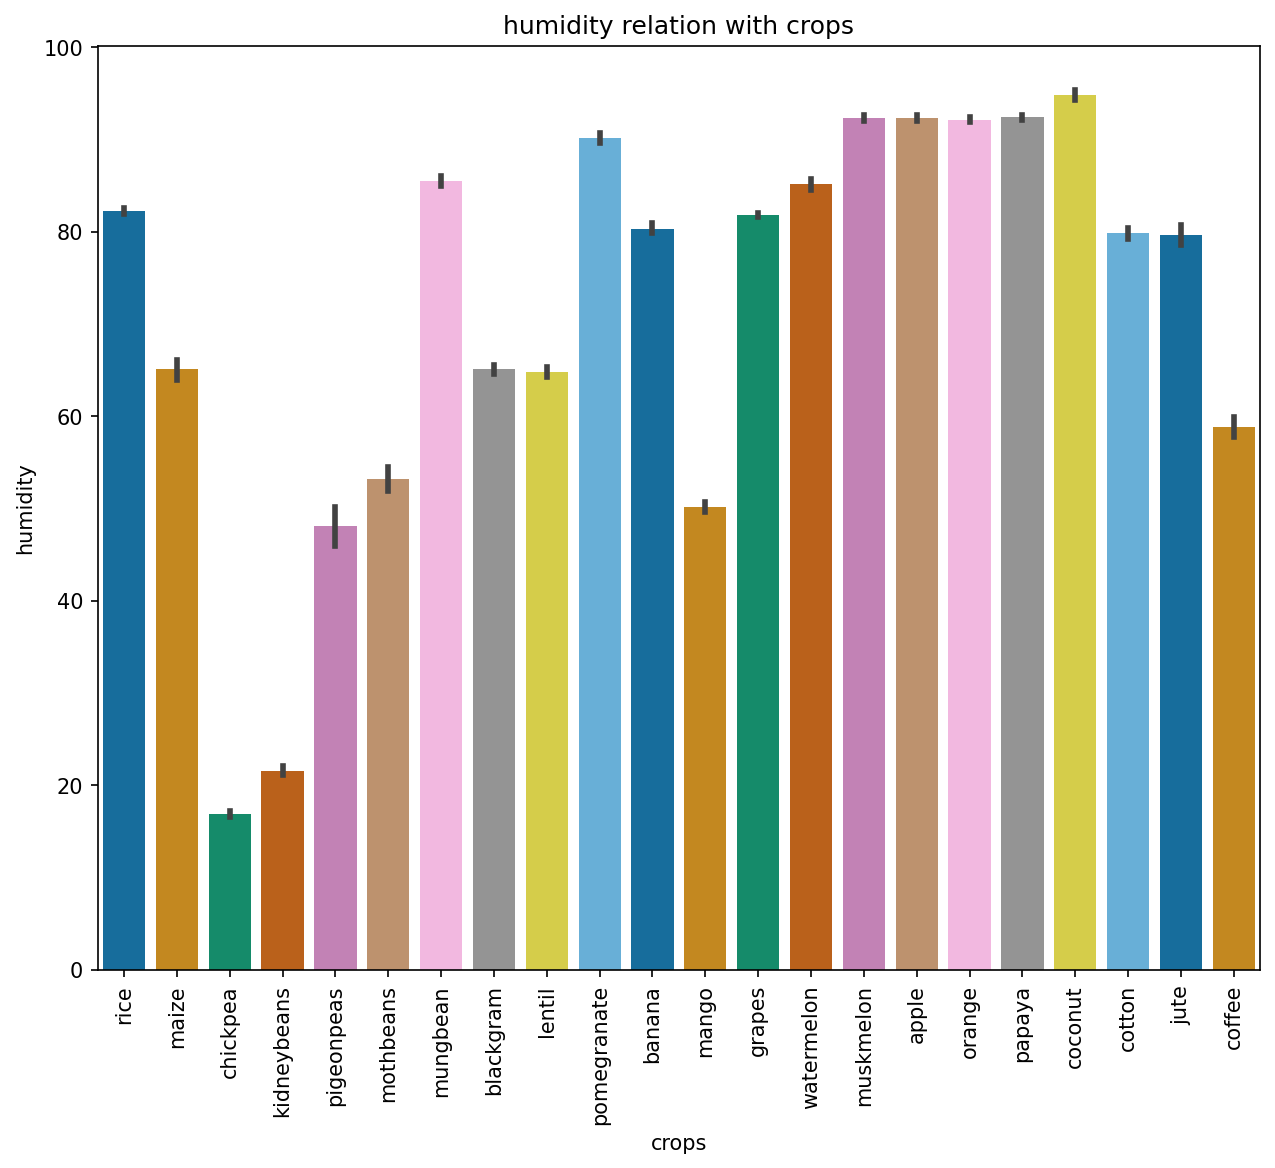

In [24]:
plt.figure(figsize=(10,8))
plt.title("humidity relation with crops")
sns.barplot(y="humidity",x="label", data=Crop_df,palette="colorblind")
plt.xticks(rotation='vertical')
plt.ylabel("humidity")
plt.xlabel("crops")

Text(0.5, 0, 'crops')

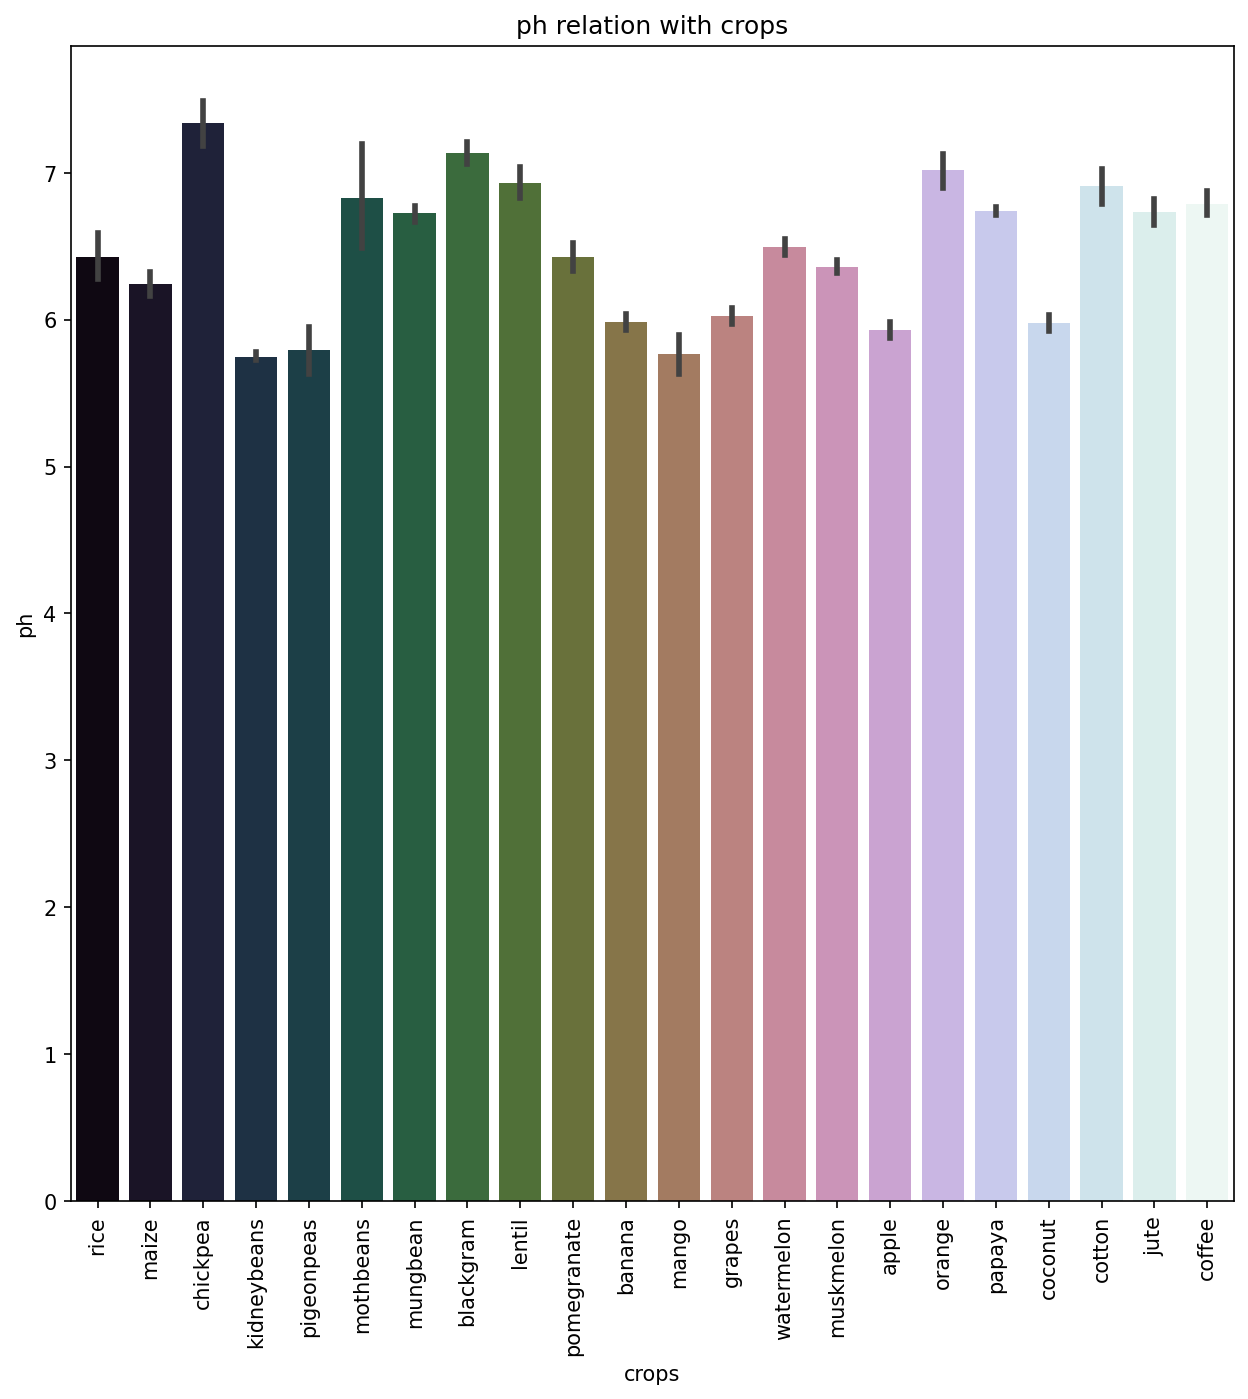

In [25]:
plt.figure(figsize=(10,10))
plt.title("ph relation with crops")
sns.barplot(y="ph",x="label", data=Crop_df,palette="cubehelix")
plt.xticks(rotation='vertical')
plt.ylabel("ph")
plt.xlabel("crops")

## ***Analysis of Chemicals***

- ### Nitrogen Analysis

In [26]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ### Phosphorous Analysis

In [27]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ### Potassium Analysis

In [28]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

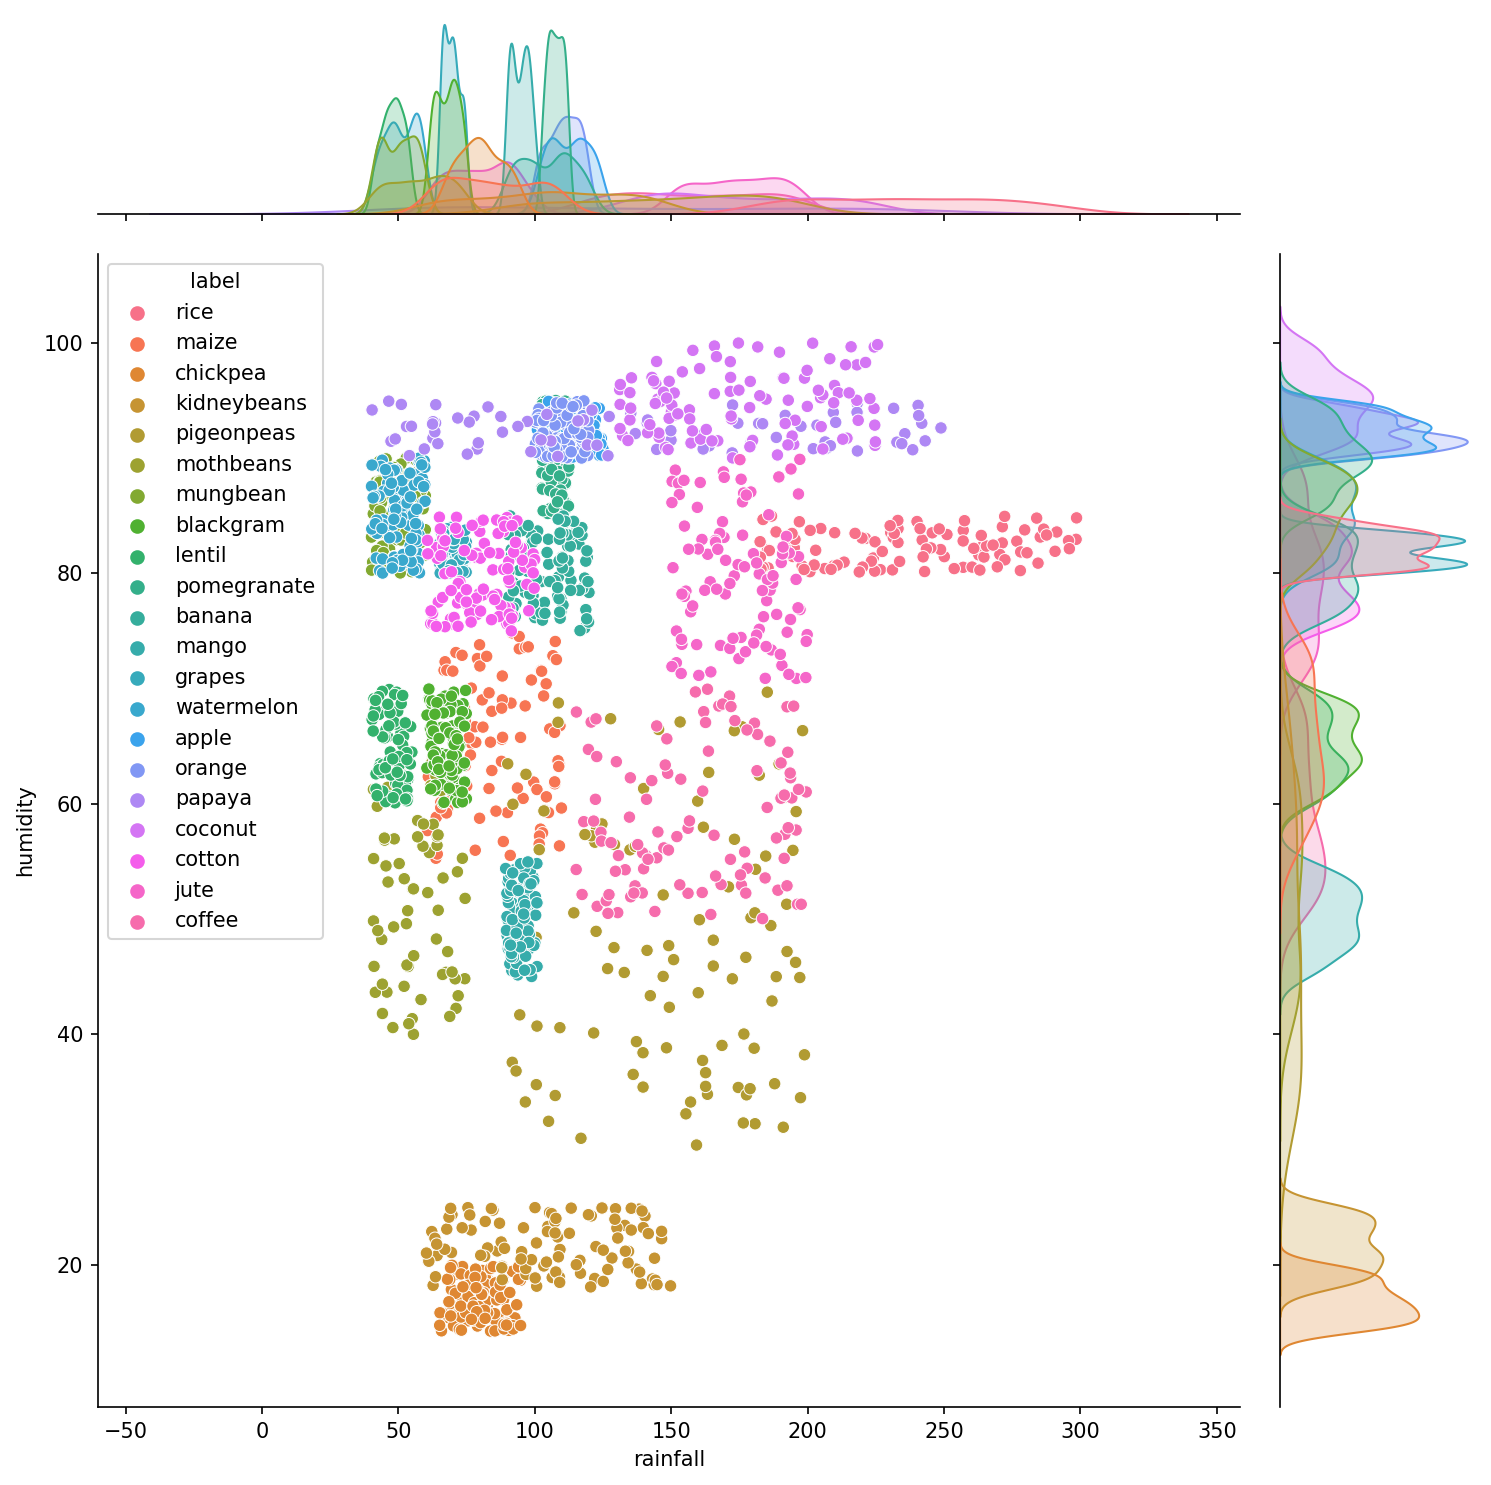

In [29]:
sns.jointplot(x="rainfall",y="humidity",data=Crop_df[(Crop_df['temperature']<40) & 
                                                  (Crop_df['rainfall']>40)],height=10, hue="label")

In [30]:
a = Crop_df[Crop_df['N'] > 120]['label'].unique()
b = Crop_df[Crop_df['P'] > 100]['label'].unique()
c = Crop_df[Crop_df['K'] > 200]['label'].unique()
d = Crop_df[Crop_df['temperature'] > 30]['label'].unique()
e = Crop_df[Crop_df['temperature'] < 10]['label'].unique()
f = Crop_df[Crop_df['humidity'] < 20]['label'].unique()
g = Crop_df[Crop_df['ph'] > 8]['label'].unique()
h = Crop_df[Crop_df['ph'] < 4]['label'].unique()
i = Crop_df[Crop_df['rainfall'] > 200]['label'].unique()
j = Crop_df[Crop_df['rainfall'] < 40]['label'].unique()

Crop_Detail = pd.DataFrame({'High Nitrogen':pd.Series(a),'High Phosphorous':pd.Series(b),
                             'High Potassium':pd.Series(c),'High Temperature':pd.Series(d),
                             'Low Temperature':pd.Series(e),'Low Humidity':pd.Series(f),
                             'High pH':pd.Series(g),'Low pH':pd.Series(h),
                             'High Rainfall':pd.Series(i),'Low Rainfall':pd.Series(j)})

Crop_Detail = Crop_Detail.replace(np.nan, '-')

display(Crop_Detail)

High Nitrogen High Phosphorous High Potassium High Temperature  \
0        cotton           grapes         grapes       pigeonpeas   
1             -            apple          apple        mothbeans   
2             -                -              -        blackgram   
3             -                -              -            mango   
4             -                -              -           grapes   
5             -                -              -           orange   
6             -                -              -           papaya   

  Low Temperature Low Humidity    High pH     Low pH High Rainfall  \
0          grapes     chickpea   chickpea  mothbeans          rice   
1               -  kidneybeans  mothbeans          -        papaya   
2               -            -          -          -       coconut   
3               -            -          -          -             -   
4               -            -          -          -             -   
5               -            -          -          -             -   
6               -            -          -          -             -   

  Low Rainfall  
0    mothbeans  
1     mungbean  
2       lentil  
3    muskmelon  
4            -  
5            -  
6            -

In [31]:
k=(Crop_df[(Crop_df['temperature'] < 20) & (Crop_df['humidity'] < 40)]['label'].unique())
l=(Crop_df[(Crop_df['temperature'] > 28) & (Crop_df['humidity'] > 40)]['label'].unique())
m=(Crop_df[(Crop_df['rainfall'] > 200)] ['label'].unique())

Seasons_For_Crop = pd.DataFrame({'Winter Crop':pd.Series(k),'Summer Crop':pd.Series(l),'Rainfall Crop':pd.Series(m)})

Seasons_For_Crop = Seasons_For_Crop.replace(np.nan, '-')

display(Seasons_For_Crop)

Winter Crop Summer Crop Rainfall Crop
0      chickpea  pigeonpeas          rice
1   kidneybeans   mothbeans        papaya
2    pigeonpeas    mungbean       coconut
3             -   blackgram             -
4             -      lentil             -
5             -      banana             -
6             -       mango             -
7             -      grapes             -
8             -   muskmelon             -
9             -      orange             -
10            -      papaya             -
11            -     coconut             -

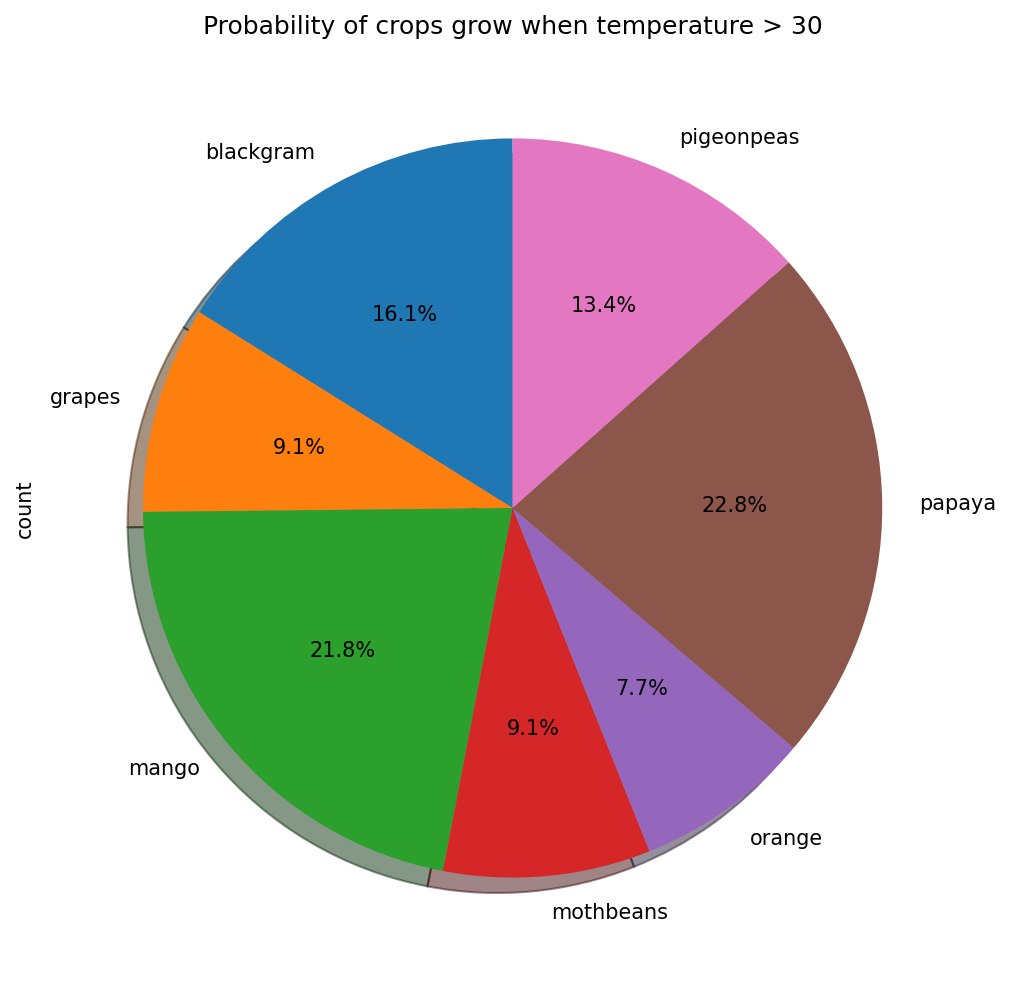

In [32]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(Crop_df.label[Crop_df.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

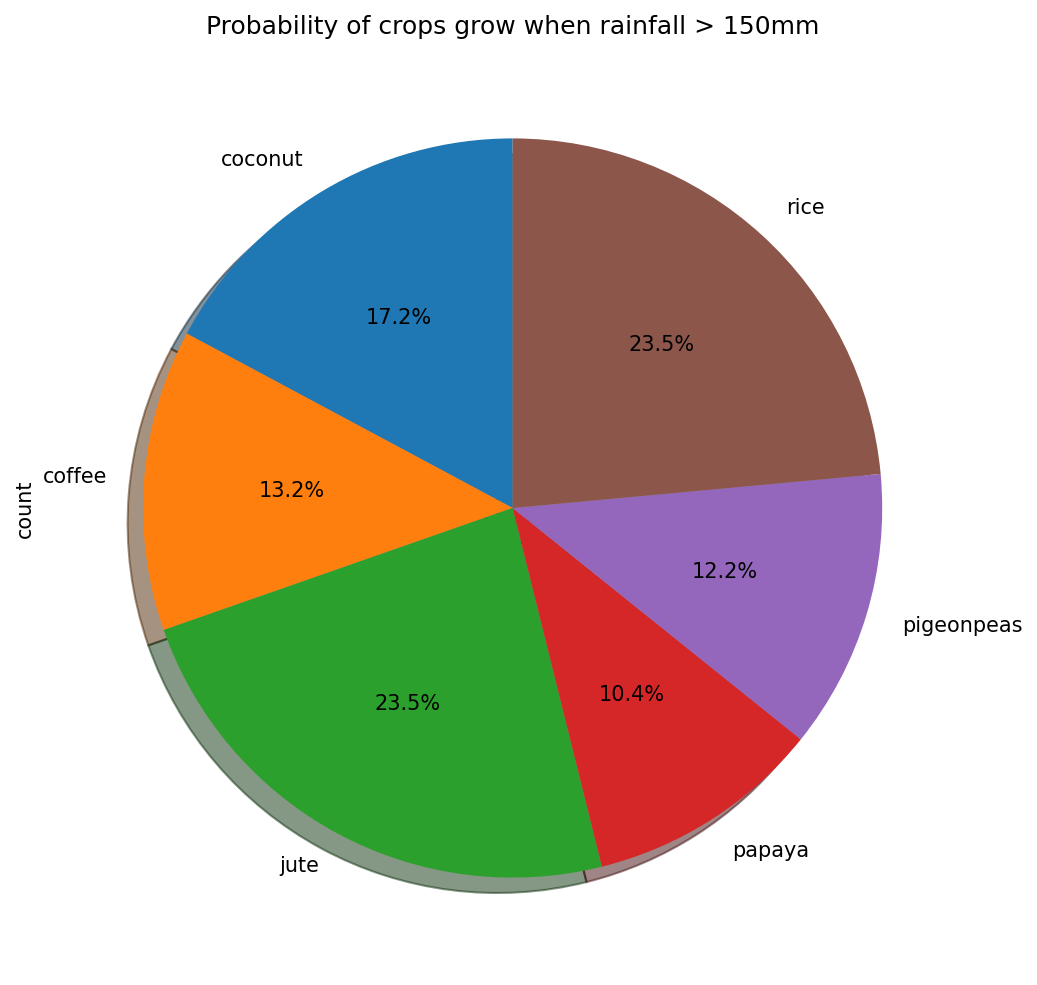

In [33]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(Crop_df.label[Crop_df.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

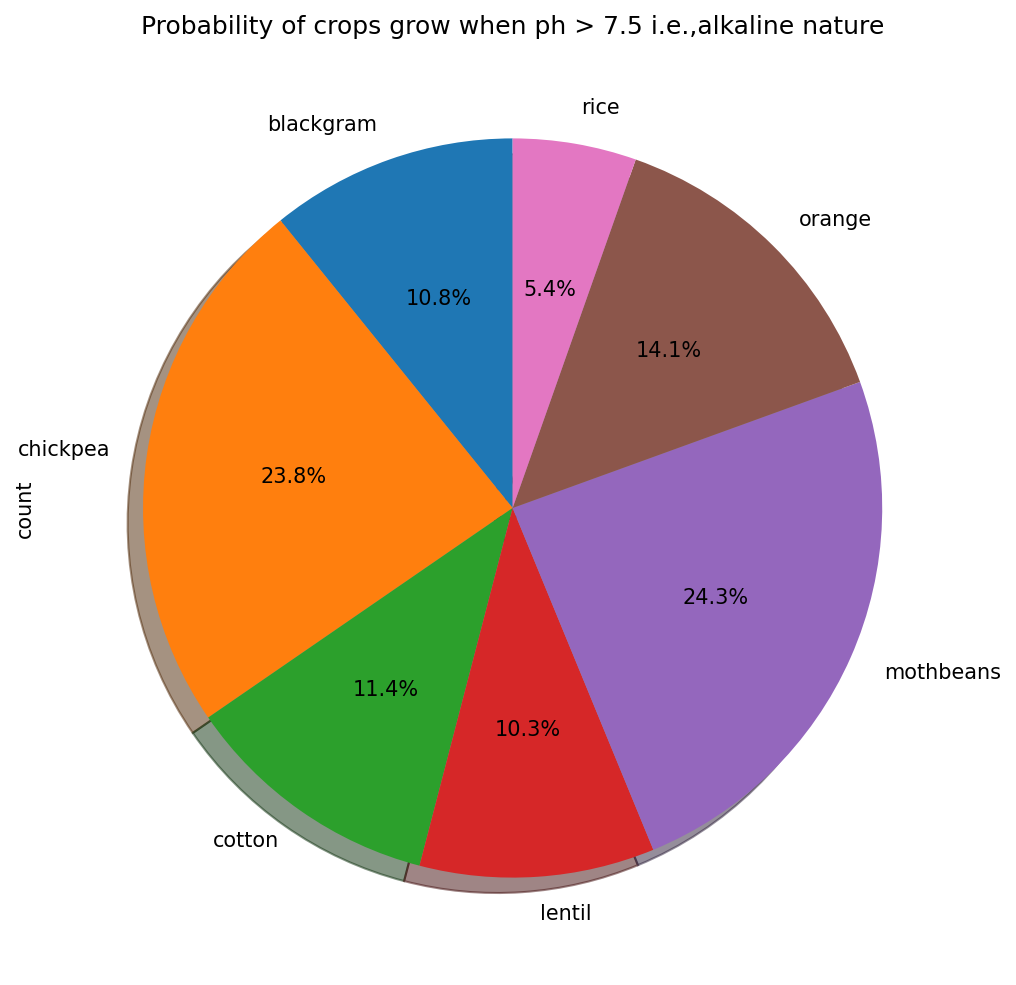

In [34]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(Crop_df.label[Crop_df.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

### Correlation with Different Features

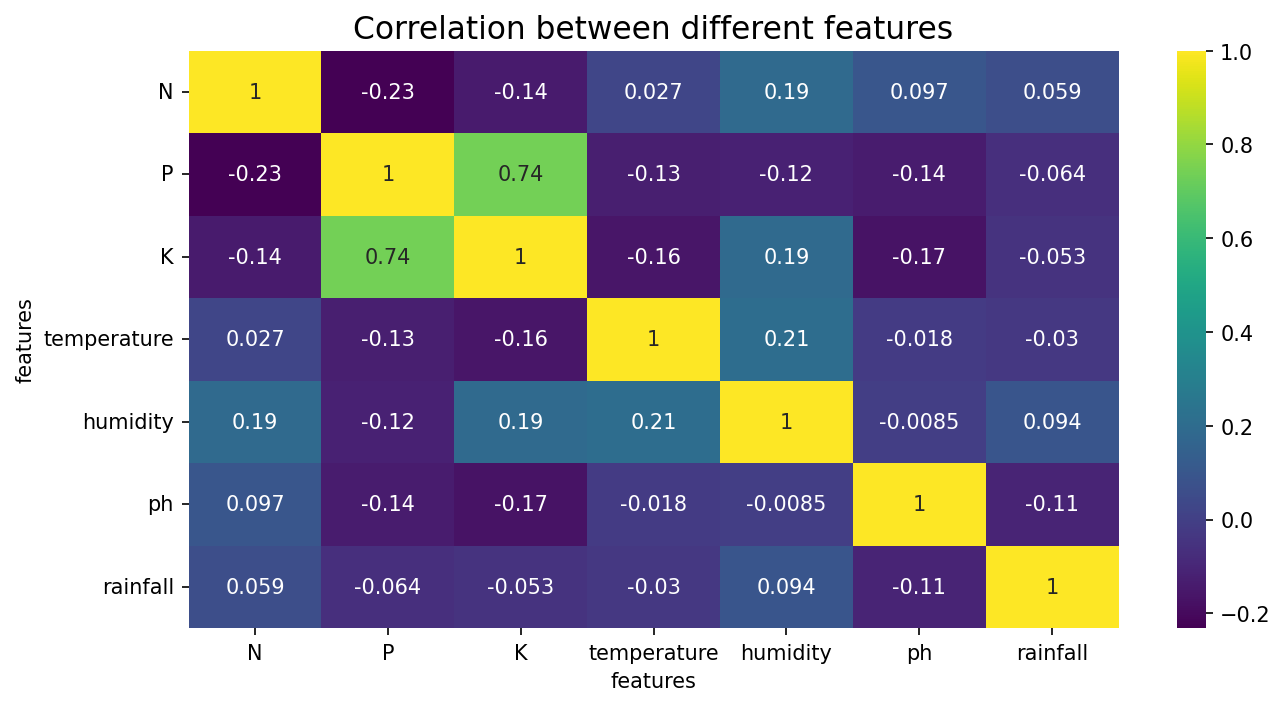

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(Crop_df.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">4. Feature Selection</p> 

In [36]:
features = Crop_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = Crop_df['label']

In [37]:
acc = []
model = []

In [38]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5. Modelling Algorithms</p> 

- ### 1. K-Nearest Neighbour Classifier

In [39]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [40]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [41]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


- ### 2. Decision Tree Classifier

In [42]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [43]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [44]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.8818181818181818
Testing accuracy =  0.9


- ### 3. Random Forest Classifier

In [45]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [46]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [47]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


- ### 4. Naive Bayes Classifier

In [48]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

In [49]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [50]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


### Accuracy Comparison

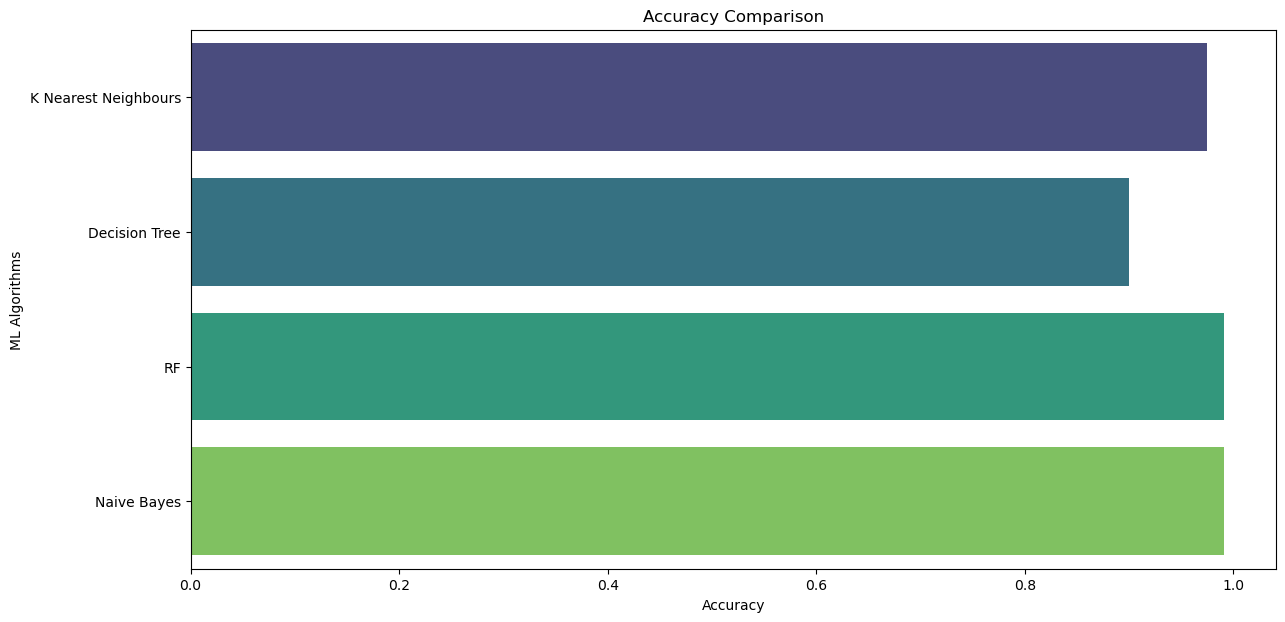

In [51]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

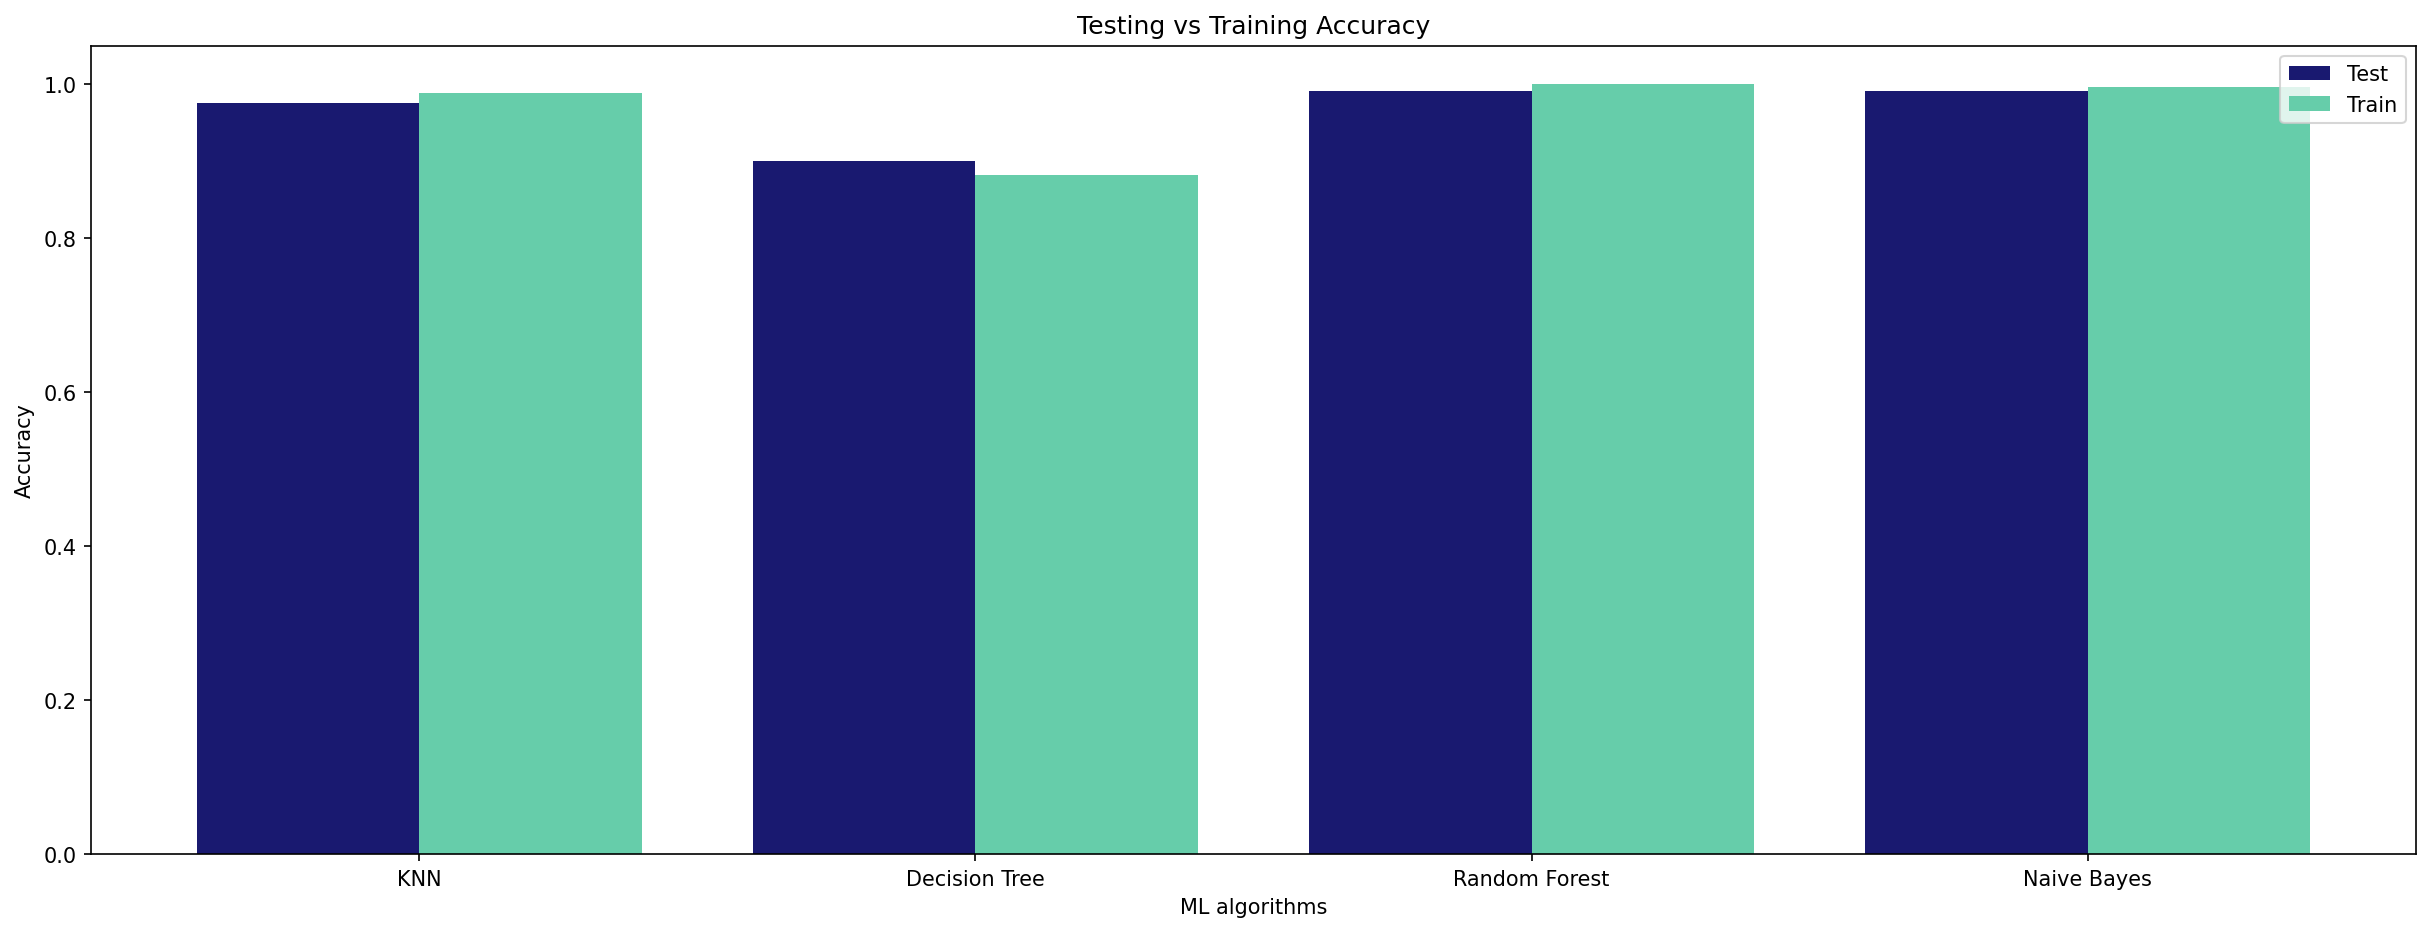

In [52]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

- ## Random Forest & Naive Bayes proves to have higher accuracy compared to other models

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">6. Model Trails</p> 

### We are manually feeding the required data to predict Crop.

In [53]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

K Nearest Neighbours --> 0.975
Decision Tree --> 0.9
RF --> 0.990909090909091
Naive Bayes --> 0.990909090909091


In [54]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [55]:
data = np.array([[50, 60, 50, 33, 91.3, 6.7, 142.9]])
prediction = DT.predict(data)
print(prediction)

['papaya']


In [56]:
data = np.array([[10,125,200,22.0,91.0,6.0,110.0]])
prediction = RF.predict(data)
print(prediction)

['apple']


In [57]:
y = Crop_df.round().groupby('label').agg((['min', 'max']))
y

N         P         K      temperature       humidity         \
             min  max  min  max  min  max         min   max      min    max   
label                                                                         
apple          0   40  120  145  195  205        21.0  24.0     90.0   95.0   
banana        80  120   70   95   45   55        25.0  30.0     75.0   85.0   
blackgram     20   60   55   80   15   25        25.0  35.0     60.0   70.0   
chickpea      20   60   55   80   75   85        17.0  21.0     14.0   20.0   
coconut        0   40    5   30   25   35        25.0  30.0     90.0  100.0   
coffee        80  120   15   40   25   35        23.0  28.0     50.0   70.0   
cotton       100  140   35   60   15   25        22.0  26.0     75.0   85.0   
grapes         0   40  120  145  195  205         9.0  42.0     80.0   84.0   
jute          60  100   35   60   35   45        23.0  27.0     71.0   90.0   
kidneybeans    0   40   55   80   15   25        15.0  25.0     18.0   25.0   
lentil         0   40   55   80   15   25        18.0  30.0     60.0   70.0   
maize         60  100   35   60   15   25        18.0  27.0     55.0   75.0   
mango          0   40   15   40   25   35        27.0  36.0     45.0   55.0   
mothbeans      0   40   35   60   15   25        24.0  32.0     40.0   65.0   
mungbean       0   40   35   60   15   25        27.0  30.0     80.0   90.0   
muskmelon     80  120    5   30   45   55        27.0  30.0     90.0   95.0   
orange         0   40    5   30    5   15        10.0  35.0     90.0   95.0   
papaya        31   70   46   70   45   55        23.0  44.0     90.0   95.0   
pigeonpeas     0   40   55   80   15   25        18.0  37.0     30.0   70.0   
pomegranate    0   40    5   30   35   45        18.0  25.0     85.0   95.0   
rice          60   99   35   60   35   45        20.0  27.0     80.0   85.0   
watermelon    80  120    5   30   45   55        24.0  27.0     80.0   90.0   

              ph       rainfall         
             min   max      min    max  
label                                   
apple        6.0   6.0    100.0  125.0  
banana       6.0   6.0     90.0  120.0  
blackgram    7.0   8.0     60.0   75.0  
chickpea     6.0   9.0     65.0   95.0  
coconut      6.0   6.0    131.0  226.0  
coffee       6.0   7.0    115.0  199.0  
cotton       6.0   8.0     61.0  100.0  
grapes       6.0   6.0     65.0   75.0  
jute         6.0   7.0    150.0  200.0  
kidneybeans  6.0   6.0     60.0  150.0  
lentil       6.0   8.0     35.0   55.0  
maize        6.0   7.0     61.0  110.0  
mango        5.0   7.0     89.0  101.0  
mothbeans    4.0  10.0     31.0   74.0  
mungbean     6.0   7.0     36.0   60.0  
muskmelon    6.0   7.0     20.0   30.0  
orange       6.0   8.0    100.0  120.0  
papaya       7.0   7.0     40.0  249.0  
pigeonpeas   5.0   7.0     90.0  199.0  
pomegranate  6.0   7.0    103.0  112.0  
rice         5.0   8.0    183.0  299.0  
watermelon   6.0   7.0     40.0   60.0